# 605.621 - Foundations of Algorithms

## Assignment 07

Sabbir Ahmed

May 2, 2021

### Question 1

\[50 pts, clique\]

A clique $H$ is defined as a subgraph of an undirected graph $G$ where there is an edge for every pair of vertices in $H$, i.e. $|E_H| = {|V_H|\choose 2}$. Describe a greedy algorithm to find a largest clique (only one of them, not all of them).

### Answer

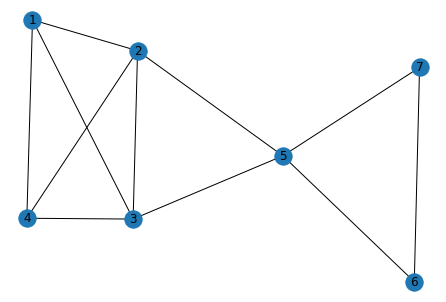

In [1]:
import networkx as nx

G = nx.Graph()  # instantiate an empty graph
# connect the nodes
G.add_edges_from([
    [1, 2], [1, 3],
    [1, 4], [2, 3],
    [2, 4], [2, 5],
    [3, 4], [3, 5],
    [5, 6], [5, 7],
    [6, 7]
])

# save the x,y coordinates of the graphical representation of the graph to overlay subgraphs in the later cells
pos = nx.spring_layout(G, seed=0)
# use networkx to draw the graph constructed
nx.draw(G, pos=pos, with_labels=True)

A clique can be found by checking the neighbors of a vertex and verifying that each of its neighbors are adjacent to each other.

In [2]:
def find_clique_greedy(graph):
    """Greedy algorithm to find a maximal clique from an input graph
    
    Params:
        G <networkx.classes.graph.Graph object>: networkx graph object
        
    Returns:
        clique <list(object)>: list of vertices
    """
    vertices = list(graph.nodes())
    # pop the vertex list for an arbitrary starting point
    clique = [vertices.pop()]
    for v in vertices:
        is_neighbor = True
        for u in clique:
            if u not in graph[v]:  # if u is not a neighbor
                is_neighbor = False
                break

        if is_neighbor:
            clique.append(v)

    return clique

In [3]:
print(find_clique_greedy(G))

[7, 5, 6]


-----------------------------------------

### Question 2

\[40 pts, MST\]

Consider the following $(G, w)$ with 9 vertices and 19 edges with distinct weights.

![graph](graph.png)

Generating the graph in `networkx`:

In [4]:
G = nx.Graph()
G.add_weighted_edges_from([
    ("A", "B", 6),
    ("A", "C", 13),
    ("A", "D", 12),
    ("A", "E", 7),
    ("B", "C", 3),
    ("B", "D", 11),
    ("B", "F", 1),
    ("C", "E", 8),
    ("C", "H", 2),
    ("D", "E", 9),
    ("D", "F", 10),
    ("D", "G", 16),
    ("E", "G", 15),
    ("E", "H", 14),
    ("F", "G", 17),
    ("F", "I", 5),
    ("G", "H", 19),
    ("G", "I", 18),
    ("H", "I", 4),
])

Forcing the Markdown tables below to be left aligned

In [5]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

a) Show the sequence of edges (labeled by weights) in the MST by Prim’s algorithm starting from vertex $A$.

### Answer

Prim's algorithm starts by picking an arbitrary vertex $v$ while the tree is not spanning, finds the shortest edge leaving the $T$ and adds it to $T$.

- Start vertex: $A$

|Queue|A|B|C|D|E|F|G|H|I|
|-|-|-|-|-|-|-|-|-|-|
|Key|0|-|-|-|-|-|-|-|-|

- Source vertex: $A$

|Queue|B|E|D|C|F|G|H|I|
|-|-|-|-|-|-|-|-|-|
|Key|6|7|12|13|-|-|-|-|

- Source vertex: $B$

|Queue|E|D|C|F|G|H|I|
|-|-|-|-|-|-|-|-|
|Key|7|11|3|1|-|-|-|

|Queue|F|C|E|D|G|H|I|
|-|-|-|-|-|-|-|-|
|Key|1|3|7|11|-|-|-|

- Source vertex: $F$

|Queue|C|E|D|G|H|I|
|-|-|-|-|-|-|-|
|Key|3|7|10|17|-|5|

|Queue|C|I|E|D|G|H|
|-|-|-|-|-|-|-|
|Key|3|5|7|10|17|-|

- Source vertex: $C$

|Queue|I|E|D|G|H|
|-|-|-|-|-|-|
|Key|5|7|10|17|2|

|Queue|H|I|E|D|G|
|-|-|-|-|-|-|
|Key|2|5|7|10|17|

- Source vertex: $H$

|Queue|I|E|D|G|
|-|-|-|-|-|
|Key|4|7|10|17|

- Source vertex: $I$

|Queue|E|D|G|
|-|-|-|-|
|Key|7|10|17|

- Source vertex: $E$

|Queue|D|G|
|-|-|-|
|Key|9|15|

- Source vertex: $D$

|Queue|G|
|-|-|
|Key|15|

|Vertex|Pi|Weight|
|:----:|:-:|:----|
|A|-1|0|
|B|A|6|
|C|B|3|
|D|E|9|
|E|I|7|
|F|B|1|
|G|E|15|
|H|C|2|
|I|H|4|

Verifying results with `networkx`:

In [6]:
mst = nx.algorithms.tree.minimum_spanning_edges(G, algorithm="prim", data=True)
mst_value = 0
for vertex in mst:
    source_vertex, current_vertex, weight = vertex
    print(source_vertex, current_vertex, weight)
    mst_value += weight["weight"]

print(f"Weight of MST is {mst_value}")

A B {'weight': 6}
B F {'weight': 1}
B C {'weight': 3}
C H {'weight': 2}
H I {'weight': 4}
A E {'weight': 7}
E D {'weight': 9}
E G {'weight': 15}
Weight of MST is 47


b) Show the sequence of edges in the MST by Kruskal’s algorithm.

### Answer

Kruskal's algorithm works by maintaining a minimum spanning forest of lightest edges.

Sorting all the edges by their weights:

In [7]:
sorted(G.edges(data=True), key=lambda x: x[-1]["weight"])

[('B', 'F', {'weight': 1}),
 ('C', 'H', {'weight': 2}),
 ('B', 'C', {'weight': 3}),
 ('H', 'I', {'weight': 4}),
 ('F', 'I', {'weight': 5}),
 ('A', 'B', {'weight': 6}),
 ('A', 'E', {'weight': 7}),
 ('C', 'E', {'weight': 8}),
 ('D', 'E', {'weight': 9}),
 ('D', 'F', {'weight': 10}),
 ('B', 'D', {'weight': 11}),
 ('A', 'D', {'weight': 12}),
 ('A', 'C', {'weight': 13}),
 ('E', 'H', {'weight': 14}),
 ('E', 'G', {'weight': 15}),
 ('D', 'G', {'weight': 16}),
 ('F', 'G', {'weight': 17}),
 ('G', 'I', {'weight': 18}),
 ('H', 'G', {'weight': 19})]

Begin adding vertices based on the weights of their edges:

- Start

|||||||||||
|-|-|-|-|-|-|-|-|-|-|
|Sets|{A}|{B}|{C}|{D}|{E}|{F}|{G}|{H}|{I}|

- Minimum: $BF = 1$

||||||||||
|-|-|-|-|-|-|-|-|-|
|Sets|{A}|{B,F}|{C}|{D}|{E}|{G}|{H}|{I}|


- Minimum: $CH = 2$

|||||||||
|-|-|-|-|-|-|-|-|
|Sets|{A}|{B,F}|{C,H}|{D}|{E}|{G}|{I}|

- Minimum: $BC = 3$

||||||||
|-|-|-|-|-|-|-|
|Sets|{A}|{B,C,F,H}|{D}|{E}|{G}|{I}|

- Minimum: $HI = 4$

|||||||
|-|-|-|-|-|-|
|Sets|{A}|{B,C,F,H,I}|{D}|{E}|{G}|

- Minimum: $AB = 6$

||||||
|-|-|-|-|-|
|Sets|{A,B,C,F,H,I}|{D}|{E}|{G}|

- Minimum: $AE = 7$

|||||
|-|-|-|-|
|Sets|{A,B,C,E,F,H,I}|{D}|{G}|

- Minimum: $DE = 9$

||||
|-|-|-|
|Sets|{A,B,C,D,E,F,H,I}|{G}|

- Minimum: $GE = 15$

|||
|-|-|
|Sets|{A,B,C,D,E,F,G,H,I}|



Verifying results with `networkx`:

In [8]:
mst = nx.algorithms.tree.minimum_spanning_edges(G, algorithm="kruskal", data=True)

mst_value = 0
for vertex in mst:
    source_vertex, current_vertex, weight = vertex
    print(source_vertex, current_vertex, weight)
    mst_value += weight["weight"]

print(f"Weight of MST is {mst_value}")

B F {'weight': 1}
C H {'weight': 2}
B C {'weight': 3}
H I {'weight': 4}
A B {'weight': 6}
A E {'weight': 7}
D E {'weight': 9}
E G {'weight': 15}
Weight of MST is 47


-----------------------------------------

### Question 3

\[10 pts, complexity, NP\]

What is the difference between NP-hard problems and NP-complete problems?

### Answer

NP problems are decision problems which can be verified in polynomial time by a non-deterministic Turing machine.

NP-hard problems are not necessarily decision problems and are hard to verify them in polynomial time.

NP-complete problems are decision problems in which all NP problems can be reduced to polynomial time. Since there is currently no solution to the proposition $P=NP$, NP-complete problems are subclasses of both NP and NP-hard problems.

-----------------------------------------